In [29]:
%load_ext autoreload
%autoreload 2 
import sim
import strategy as strat
import message
import pickle
from datetime import datetime
from matplotlib import pyplot as plt
from pylab import rcParams
from sortedcontainers import SortedDict
from collections import deque
import copy
rcParams['figure.figsize'] = 15, 10

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
def show(pnl, times):
    times = list(map(datetime.fromtimestamp, times))
    plt.plot(times, pnl)
    plt.grid(True)
    plt.show()

In [31]:
with open('data.pickle', 'rb') as f:
    data = pickle.load(f)
len(data)

745530

In [32]:
class Task2(strat.Strategy):    
    def __init__(self):
        #self.usd = []
        #self.btc = []
        self.predict = deque()
    
    def on_update(self, update: message.Update, balance: message.Balance) -> float:
        self.predict.append((update.ts + 2, update.future_mid_price))
        
        while len(self.predict) > 0 and update.ts > self.predict[0][0]:
            self.predict.popleft()
        
        #self.usd.append(balance.usd)
        #self.btc.append(balance.btc)
        
        mid_price = (update.order_book.bid_price[0] + update.order_book.ask_price[0]) / 2
        middle_mid_price = self.predict[len(self.predict) // 2][1]
        
        if update.order_book.ask_price[0] - update.order_book.bid_price[0] > 20:
            return 0
        
        if update.order_book.ask_price[0] < update.future_mid_price - 2 and update.order_book.ask_price[0] < middle_mid_price - 1:
            return balance.usd
        if update.order_book.bid_price[0] > update.future_mid_price + 2 and update.order_book.bid_price[0] > middle_mid_price + 1:
            return -balance.btc
        if update.order_book.ask_price[0] < middle_mid_price - 4:
            return balance.usd
        if update.order_book.bid_price[0] > middle_mid_price + 4:
            return -balance.btc
        return 0

In [33]:
start_balance = 100000

In [34]:
sol = Task2()
balance_history, pnl, times, mid_price = sim.simulate(
    strategy=sol,
    data=data,
    start_balance=start_balance,
    version='task2',
)

  0%|          | 0/745530 [00:00<?, ?it/s]

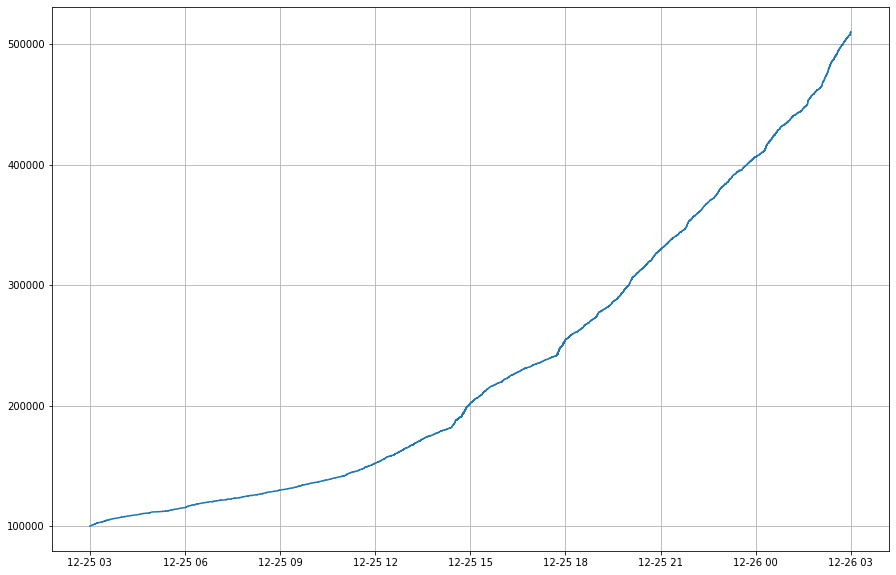

In [35]:
show(pnl, times)